# City Load Forecating

<b> Objectives: <b>
    
1) To determine the most performant machine learning algorithm for very short-term load forecasting for cities.
2) To identify very important features influencing very short-term load forecasting for cities.
3) To understand how can machine learning algorithms could be optimized for load forecasting for cities.

<b> Findings <b> 

The results show the LSTM model as the most performant model in forecasting very short-term load for cities with an MAE of 0.100, RMSE of 0.010 and MAPE of 4.25%. Hour of the day, day of the year, general diffuse flows and temperature were determined to be the most important predictors for forecasting very short-term load for cities. Finally, model optimization was achieved using BayesSearchCV, GridSearchCV and Hyperband cross validation algorithms, sklearn timeseriessplit function with 10 folds cross validation to demonstrate how the performances of machine learning models could be improved using hyperparameter tuning and cross validation techniques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Tetuan City power consumption.csv", sep = ";")

In [3]:
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Quads                  52416 non-null  float64
 7   Smir                   52416 non-null  float64
 8   Boussafou              52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
from datetime import datetime

In [7]:
# Transforming DateTime to datetime format
data['DateTime'] =  pd.to_datetime(data['DateTime'])

In [8]:
def create_features(data):
    """
    Create time series features like hour, month, year, day, etc. based on time series index.
    """
    df = data.copy()
    df['hour'] = df["DateTime"].dt.hour
    df['dayofweek'] = df["DateTime"].dt.dayofweek
    df['quarter'] = df["DateTime"].dt.quarter
    df['month'] = df["DateTime"].dt.month
#     df['year'] = df["DateTime"].dt.year
    df['dayofyear'] = df["DateTime"].dt.dayofyear
    df['dayofmonth'] = df["DateTime"].dt.day
    df['weekofyear'] = df["DateTime"].dt.isocalendar().week
#     df["minute"] = df["DateTime"].dt.minute
#     df["second"] = df["DateTime"].dt.second
    return df
data = create_features(data)

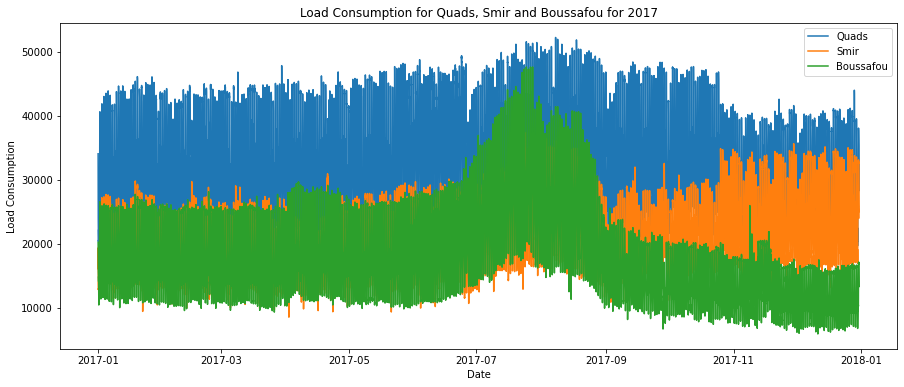

In [9]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Quads'],label = "Quads")
plt.plot(data['DateTime'], data['Smir'],label = "Smir")
plt.plot(data['DateTime'], data['Boussafou'],label = "Boussafou")
plt.title("Load Consumption for Quads, Smir and Boussafou for 2017")
plt.xlabel("Date")
plt.ylabel("Load Consumption")
plt.legend()
plt.savefig("Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

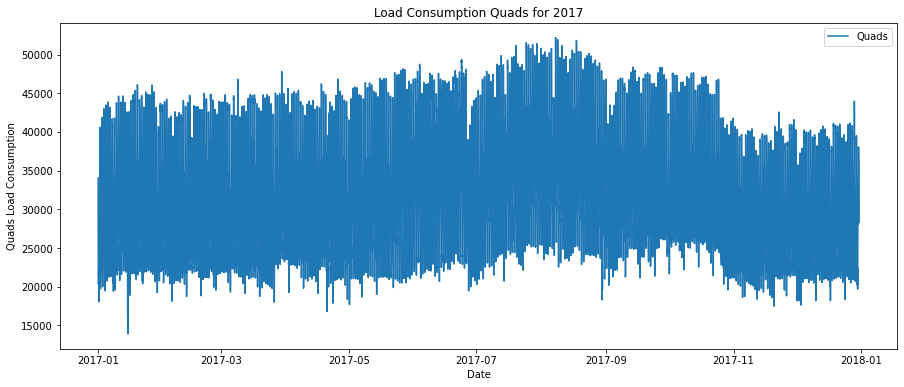

In [10]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Quads'],label = "Quads")
plt.title("Load Consumption Quads for 2017")
plt.xlabel("Date")
plt.ylabel("Quads Load Consumption")
plt.legend()
plt.savefig("Quads Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

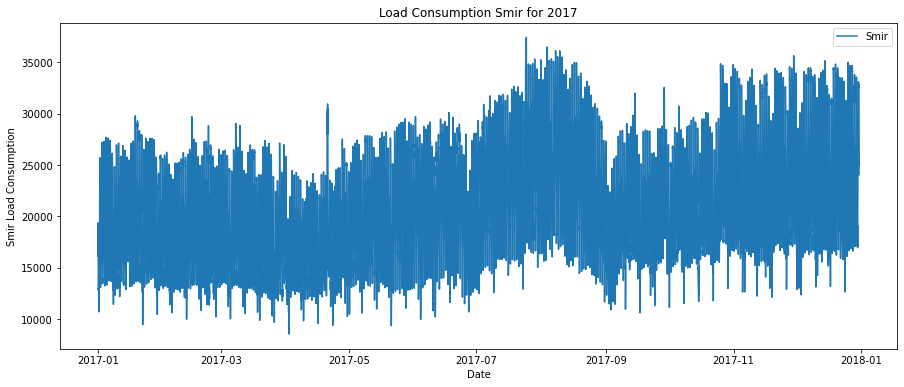

In [11]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Smir'],label = "Smir")
plt.title("Load Consumption Smir for 2017")
plt.xlabel("Date")
plt.ylabel("Smir Load Consumption")
plt.legend()
plt.savefig("Smir Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

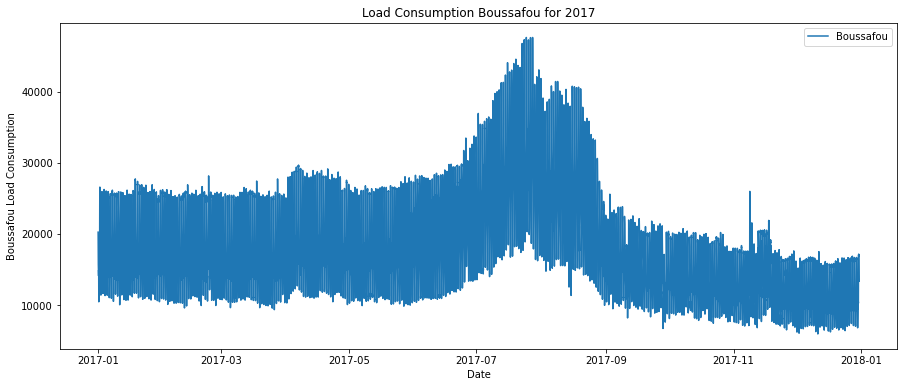

In [12]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Boussafou'],label = "Boussafou")
plt.title("Load Consumption Boussafou for 2017")
plt.xlabel("Date")
plt.ylabel("Boussafou Load Consumption")
plt.legend()
plt.savefig("Boussafou Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

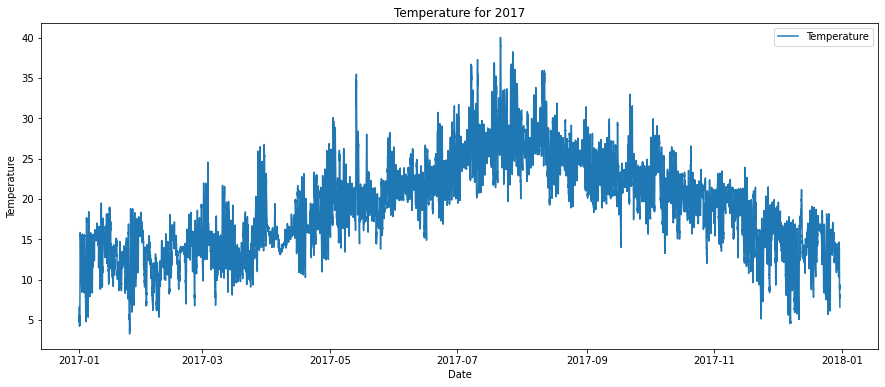

In [13]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Temperature'],label = "Temperature")
plt.title("Temperature for 2017")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.savefig("Temperature.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

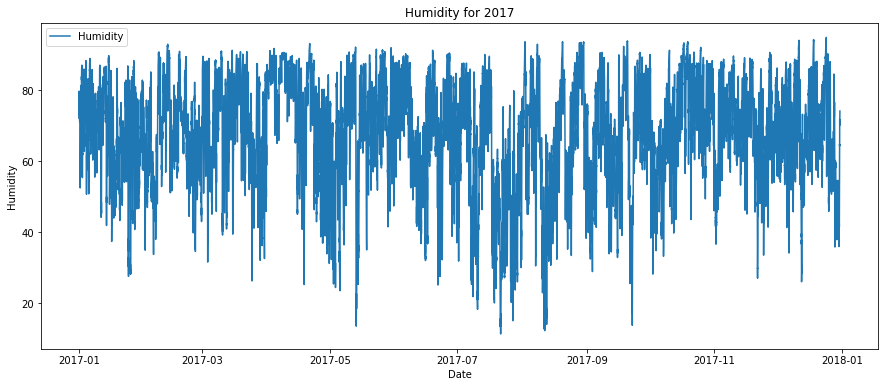

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Humidity'],label = "Humidity")
plt.title("Humidity for 2017")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.legend()
plt.savefig("Humidity.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

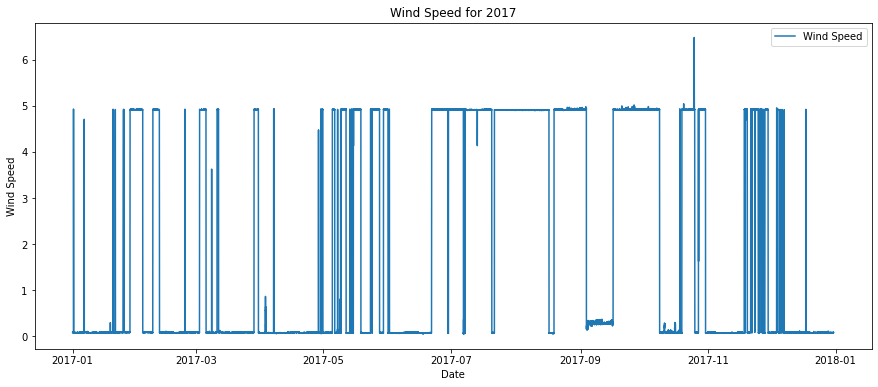

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['Wind Speed'],label = "Wind Speed")
plt.title("Wind Speed for 2017")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.legend()
plt.savefig("Wind Speed.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

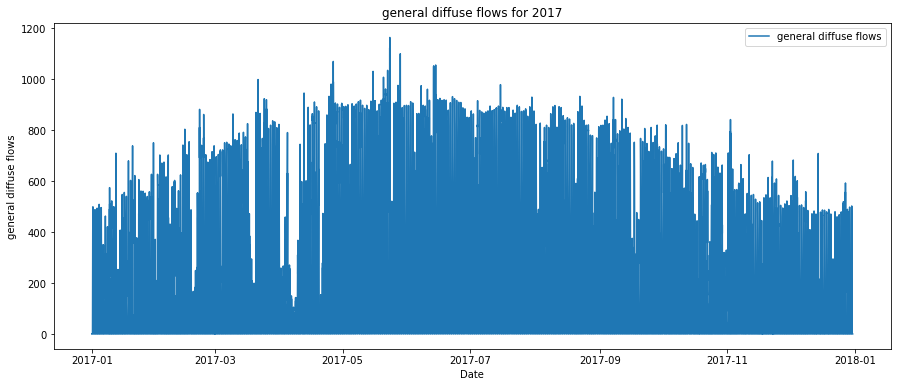

In [16]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['general diffuse flows'],label = "general diffuse flows")
plt.title("general diffuse flows for 2017")
plt.xlabel("Date")
plt.ylabel("general diffuse flows")
plt.legend()
plt.savefig("general diffuse flows.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

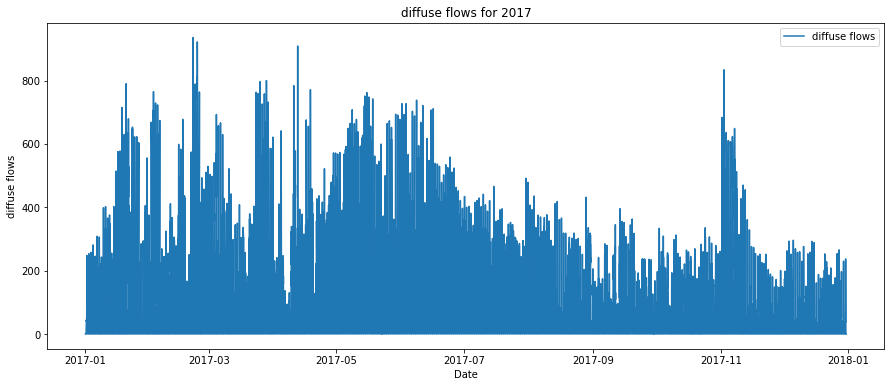

In [17]:
plt.figure(figsize=(15,6))
plt.plot(data['DateTime'], data['diffuse flows'],label = "diffuse flows")
plt.title("diffuse flows for 2017")
plt.xlabel("Date")
plt.ylabel("diffuse flows")
plt.legend()
plt.savefig("diffuse flows.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

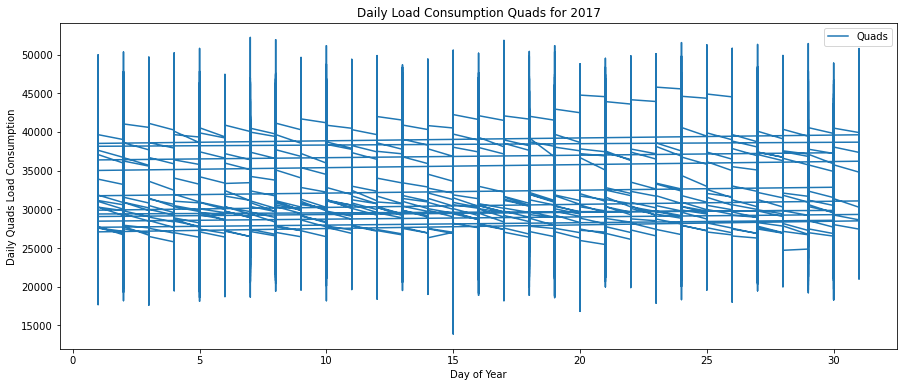

In [22]:
plt.figure(figsize=(15,6))
plt.plot(data['dayofmonth'], data['Quads'],label = "Quads")
plt.title("Daily Load Consumption Quads for 2017")
plt.xlabel("Day of Year")
plt.ylabel("Daily Quads Load Consumption")
plt.legend()
plt.savefig("Daily Quads Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

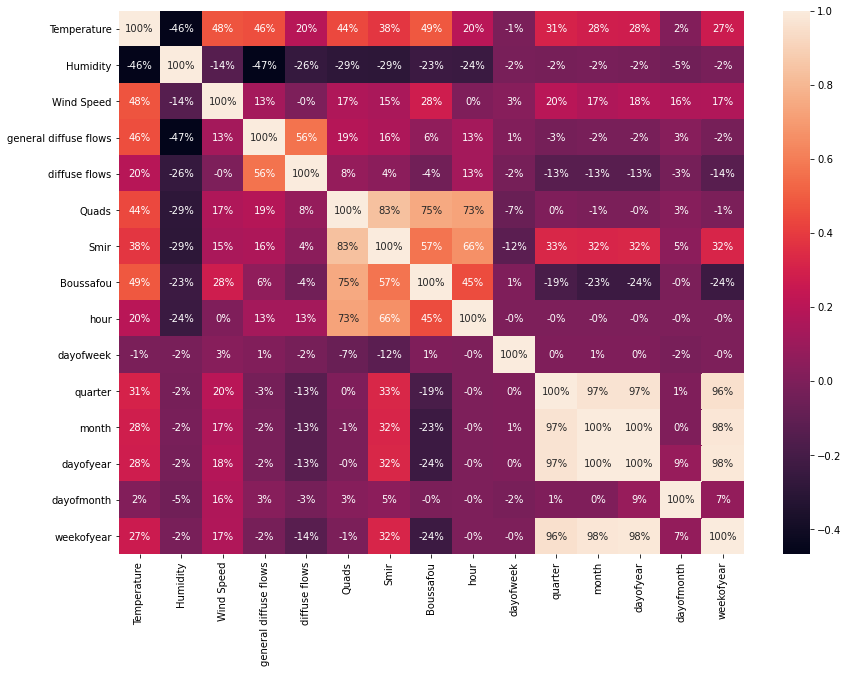

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, fmt='.0%')
plt.savefig("Multicollinearity.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

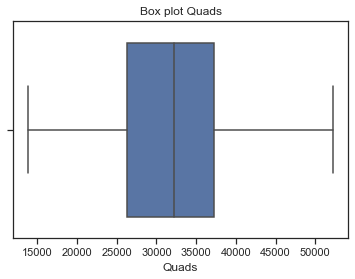

In [24]:
sns.set(style="ticks")
fig, ax = plt.subplots()
sns.boxplot(x=data["Quads"], ax=ax, whis=1.5)
plt.title("Box plot Quads")
plt.savefig("Box plot Quads.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

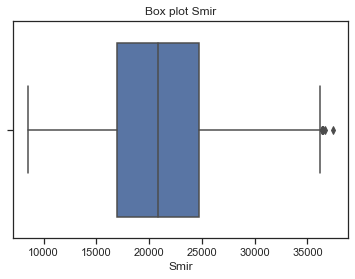

In [25]:
sns.set(style="ticks")
fig, ax = plt.subplots()
sns.boxplot(x=data["Smir"], ax=ax, whis=1.5)
plt.title("Box plot Smir")
plt.savefig("Box plot Smir.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

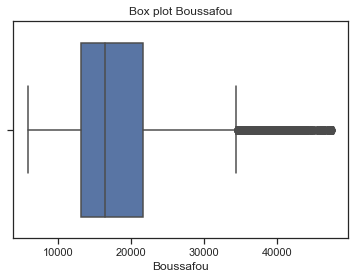

In [26]:
sns.set(style="ticks")
fig, ax = plt.subplots()
sns.boxplot(x=data["Boussafou"], ax=ax, whis=1.5)
plt.title("Box plot Boussafou")
plt.savefig("Box plot Boussafou.jpeg", dpi=300, bbox_inches= "tight")
plt.show

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data["Quads"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -32.12127853462605
p-value: 0.0
Critical Values: {'1%': -3.4304749044184266, '5%': -2.861595205242518, '10%': -2.566799383915253}


In [28]:
result = adfuller(data["Smir"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -25.222163771003686
p-value: 0.0
Critical Values: {'1%': -3.4304749044184266, '5%': -2.861595205242518, '10%': -2.566799383915253}


In [29]:
result = adfuller(data["Boussafou"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.36686797515673
p-value: 2.83513308690433e-29
Critical Values: {'1%': -3.4304749044184266, '5%': -2.861595205242518, '10%': -2.566799383915253}


In [18]:
def is_divisible_by_two(number):
    if number % 2 == 0:
        return True
    else:
        return False
number = 43776
if is_divisible_by_two(number):
    print(number, "is divisible by 2")
else:
    print(number, "is not divisible by 2")

43776 is divisible by 2


In [9]:
def is_divisible_by(number, divisors):
    for divisor in divisors:
        if number % divisor == 0:
            print(divisor)
            continue
            return True
    else:
        return False
number = 39312
divisors = [3,5,6,9,10]
if is_divisible_by(number, divisors):
    print(number, "is divisible by", divisors)
else:
    print(number, "is not divisible by any divisors")

3
6
9
39312 is not divisible by any divisors


<function matplotlib.pyplot.show(close=None, block=None)>

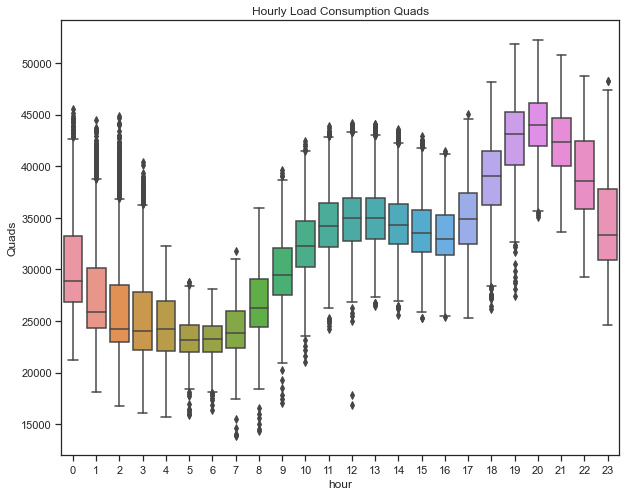

In [31]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, x= "hour", y = "Quads" )
plt.title("Hourly Load Consumption Quads")
plt.savefig("Hourly Quads Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

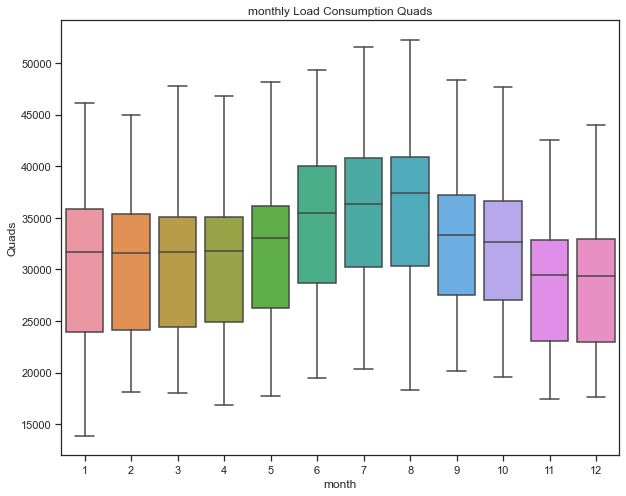

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, x= "month", y = "Quads" )
plt.title("monthly Load Consumption Quads")
plt.savefig("monthly Quads Load Consumption.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

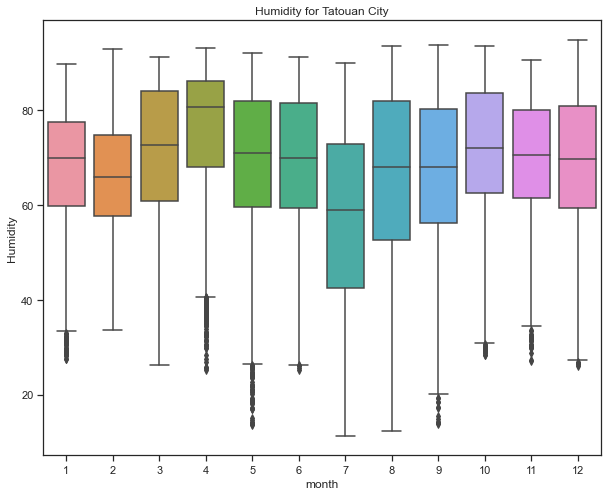

In [191]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, x= "month", y = "Humidity" )
plt.title("Humidity for Tatouan City")
plt.savefig("Humidity for Tatouan City.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

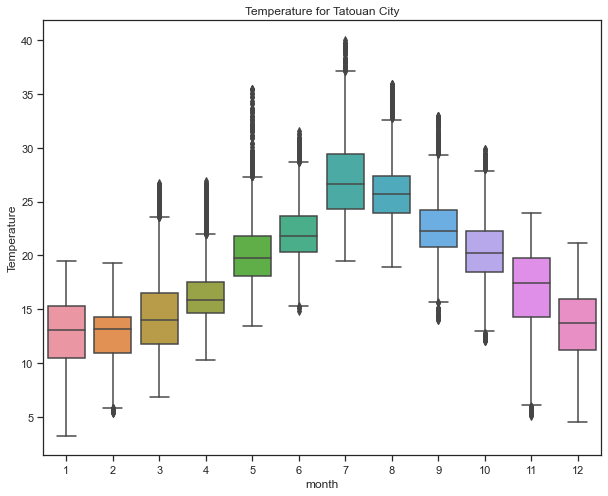

In [192]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, x= "month", y = "Temperature" )
plt.title("Temperature for Tatouan City")
plt.savefig("Temperature for Tatouan City.jpeg", dpi=300, bbox_inches= "tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

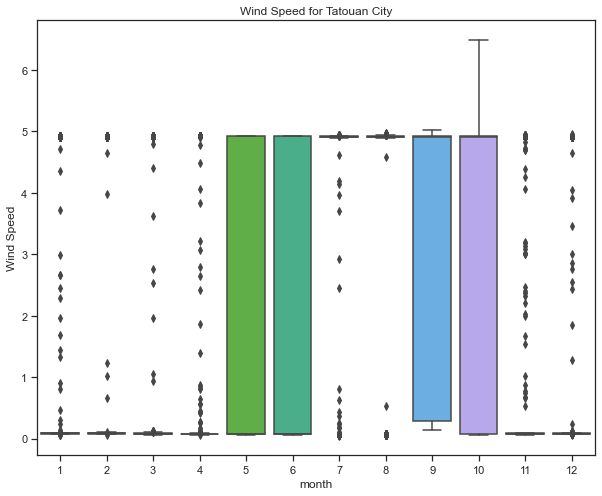

In [193]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, x= "month", y = "Wind Speed" )
plt.title("Wind Speed for Tatouan City")
plt.savefig("Wind Speed for Tatouan City.jpeg", dpi=300, bbox_inches= "tight")
plt.show

Preprocessing

In [34]:
split_date = pd.to_datetime('2017-10-01 00:00:00')

In [35]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,1,1,52
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,1,1,52
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,1,1,52
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,1,1,52
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,52
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,52
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,364,30,52
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,364,30,52


In [36]:
# Split the data based on the split date
train_data = data[data['DateTime'] < split_date]
test_data = data[data['DateTime'] >= split_date]

In [37]:
test_data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear
39312,2017-10-01 00:00:00,18.12,87.6,4.916,0.080,0.163,31755.62363,17985.06224,14898.96657,0,6,4,10,274,1,39
39313,2017-10-01 00:10:00,18.00,88.5,4.916,0.055,0.137,31175.84245,17611.61826,14531.30699,0,6,4,10,274,1,39
39314,2017-10-01 00:20:00,18.01,88.4,4.916,0.069,0.148,30154.92341,17148.54772,14321.21581,0,6,4,10,274,1,39
39315,2017-10-01 00:30:00,18.16,88.4,4.914,0.062,0.167,29764.20131,16827.38589,14198.66261,0,6,4,10,274,1,39
39316,2017-10-01 00:40:00,18.18,89.1,4.917,0.051,0.115,29600.35011,16621.99170,13889.36170,0,6,4,10,274,1,39


In [38]:
# Setting DateTime as index
data = data.set_index('DateTime')

In [39]:
# Get the feature columns and target column
feature_cols = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','hour','dayofweek','dayofyear','dayofmonth']  # Replace with your actual feature columns
target_col = 'Quads'  # Replace with your actual target column

In [40]:
feature_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'hour',
 'dayofweek',
 'dayofyear',
 'dayofmonth']

In [41]:
target_col

'Quads'

In [42]:
# Extract the feature and target data for training
X_train = train_data[feature_cols]
y_train = train_data[target_col]

In [43]:
X_train

,Temperature,Humidity,Wind Speed,general diffuse flows,hour,dayofweek,dayofyear,dayofmonth
0,6.559,73.8,0.083,0.051,0,6,1,1
1,6.414,74.5,0.083,0.070,0,6,1,1
2,6.313,74.5,0.080,0.062,0,6,1,1
3,6.121,75.0,0.083,0.091,0,6,1,1
4,5.921,75.7,0.081,0.048,0,6,1,1
...,...,...,...,...,...,...,...,...
39307,18.420,86.9,4.918,0.084,23,5,273,30
39308,18.400,87.1,4.920,0.062,23,5,273,30
39309,18.440,87.5,4.917,0.055,23,5,273,30
39310,18.360,87.7,4.919,0.062,23,5,273,30


In [44]:
# Make a copy of dataset
data_new = X_train.copy()

In [45]:
X_test = test_data[feature_cols]
y_test = test_data[target_col]

In [46]:
X_test

,Temperature,Humidity,Wind Speed,general diffuse flows,hour,dayofweek,dayofyear,dayofmonth
39312,18.120,87.6,4.916,0.080,0,6,274,1
39313,18.000,88.5,4.916,0.055,0,6,274,1
39314,18.010,88.4,4.916,0.069,0,6,274,1
39315,18.160,88.4,4.914,0.062,0,6,274,1
39316,18.180,89.1,4.917,0.051,0,6,274,1
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,23,5,364,30
52412,6.947,72.6,0.082,0.051,23,5,364,30
52413,6.900,72.8,0.086,0.084,23,5,364,30
52414,6.758,73.0,0.080,0.066,23,5,364,30


In [47]:
# Normalise X and y
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.array(y_train).reshape(-1,1)
y_train = scaler.fit_transform(y_train)

X_test = scaler.fit_transform(X_test)
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.fit_transform(y_test)

In [48]:
y_train

array([[0.52625123],
       [0.41554498],
       [0.39762262],
       ...,
       [0.52993494],
       [0.5101423 ],
       [0.49484043]])

In [49]:
# Set up rolling window cross-validation
window_size = 9  # Set the window size as desired
n_splits = 20 - window_size + 1  # Number of splits based on window size

In [50]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Modelling

Random Forest

In [51]:
import pandas as pd
import numpy as np
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
# Train the Random Forest model
model = RandomForestRegressor()
param_space = {'n_estimators': (50,100,200,400,800),
               'max_depth': (1,3,6,8,9,10),
               'min_samples_split': (2,3,5,10),
               'min_samples_leaf': (1, 4)
              }
    
# Perform time series cross-validation with Bayesian optimization
opt_rf = BayesSearchCV(model,
        param_space,
        cv=tscv,
        scoring='neg_mean_absolute_error',  # Use MAE for optimization
        n_iter=20,  # Number of parameter settings to sample
        n_jobs=-1,  # Use all available CPU cores
        return_train_score=True,
        refit=True,
        random_state=42
                   )
opt_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_model_rf = opt_rf.best_estimator_

# Print the best parameters and score
print("Best parameters found: ", opt_rf.best_params_)
print("Best score: ", -opt_rf.best_score_)

best_model_rf.fit(X_train, y_train)


/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:  OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 800)])
Best score:  0.049645958113970316


<ipython-input-52-ce9c161564e1>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=800)

In [56]:
# Get feature importances
feature_importance_rf = best_model_rf.feature_importances_

# Print the feature importances
for feature, importance in zip(data_new.columns, feature_importance_rf):
    print(f"Feature: {feature}, Importance: {importance}")

    # Convert feature importance to dataframe
    feature_importance_rf = pd.DataFrame({'Features': feature_cols, 'Importance': feature_importance_rf})

    # Sort the dataframe by feature importance in descending order
    feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_rf['Features'], feature_importance_rf['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Random Forest')
plt.xticks(rotation=45)
plt.savefig("Feature Importance Random Forest.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

Feature: Temperature, Importance: 0.013557205372079197
Feature: Humidity, Importance: 0.002339576680424526


ValueError: could not broadcast input array from shape (2,) into shape (8,)

In [58]:
# Sort the dataframe by feature importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

In [59]:
feature_importance_rf

,Features,Importance
4,hour,0.805878
6,dayofyear,0.137044
3,general diffuse flows,0.018529
5,dayofweek,0.014742
0,Temperature,0.013557
7,dayofmonth,0.006229
1,Humidity,0.002340
2,Wind Speed,0.001681


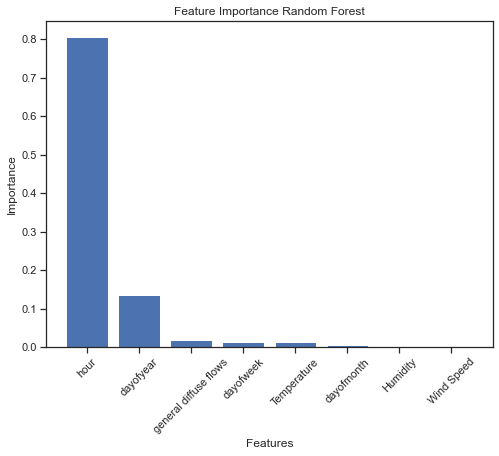

In [60]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_rf['Features'], feature_importance_rf['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Random Forest')
plt.xticks(rotation=45)
plt.savefig("Feature Importance Random Forest.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

In [61]:
# Make predictions using the best model
y_pred_rf = best_model_rf.predict(X_test)

In [62]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [63]:
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

In [64]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [65]:
# Calculate evaluation metrics
print("MAE: ", mae_rf)
print("MAPE: ", mape_rf)
print("RMSE: ", rmse_rf)

MAE:  0.12857581164102688
MAPE:  9038140124530.967
RMSE:  0.1553312420977642


In [220]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-8
    ape = np.abs((y_true - y_pred) / (y_true +  epsilon)) * 100
    mape = np.mean(ape)
    return mape

In [221]:
y_true = y_test
y_pred = y_pred_rf

mape_rf = mean_absolute_percentage_error(y_true, y_pred)
print("mape_rf: %.2f%%" % mape_rf)

mape_rf: 200737.50%


In [222]:
y_true = y_test
y_pred = y_pred_xgb

mape_xgb = mean_absolute_percentage_error(y_true, y_pred)
print("mape_xgb: %.2f%%" % mape_xgb)

mape_xgb: 191072.46%


In [223]:
y_true = y_test
y_pred = y_pred_svr

mape_svr = mean_absolute_percentage_error(y_true, y_pred)
print("mape_svr: %.2f%%" % mape_svr)

mape_svr: 350624.60%


In [224]:
y_true = y_test
y_pred = y_pred_lstm

mape_lstm = mean_absolute_percentage_error(y_true, y_pred)
print("mape_lstm: %.2f%%" % mape_lstm)

mape_lstm: 362895.67%


In [213]:
y_test = y_test.flatten()

In [214]:
y_test

array([0.47293417, 0.45372258, 0.41989347, ..., 0.40120319, 0.38023809,
       0.36007935])

In [212]:
y_pred_svr

array([0.29178852, 0.29005356, 0.29020087, ..., 0.60459291, 0.6026606 ,
       0.60011905])

In [210]:
y_true.ndim

2

In [207]:
for i in range(len(y_pred)):
    print(i[0])

TypeError: 'int' object is not subscriptable

In [66]:
# Unscale predictions
unscaled_values_rf = scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()

In [67]:
# Adding Random Forest Predictions to original data
test_data["Predictions_Random_Forest"] = unscaled_values_rf 

<ipython-input-67-4be0e3e52f34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions_Random_Forest"] = unscaled_values_rf


In [68]:
test_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,Predictions_Random_Forest
39312,2017-10-01 00:00:00,18.120,87.6,4.916,0.080,0.163,31755.62363,17985.06224,14898.96657,0,6,4,10,274,1,39,28166.716330
39313,2017-10-01 00:10:00,18.000,88.5,4.916,0.055,0.137,31175.84245,17611.61826,14531.30699,0,6,4,10,274,1,39,27807.465370
39314,2017-10-01 00:20:00,18.010,88.4,4.916,0.069,0.148,30154.92341,17148.54772,14321.21581,0,6,4,10,274,1,39,27859.279385
39315,2017-10-01 00:30:00,18.160,88.4,4.914,0.062,0.167,29764.20131,16827.38589,14198.66261,0,6,4,10,274,1,39,27863.983801
39316,2017-10-01 00:40:00,18.180,89.1,4.917,0.051,0.115,29600.35011,16621.99170,13889.36170,0,6,4,10,274,1,39,27702.411104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,52,33703.188752
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,52,33735.246641
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,364,30,52,33915.001031
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,364,30,52,33866.526701


Extreme Gradient Boosting

In [69]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [70]:
# Load your multivariate time series data
# Assuming you have features 'X' (pandas DataFrame of shape (n_samples, n_features))
# and target variable 'y' (pandas Series or array of shape (n_samples,))

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50,100,200,400,800],
    'max_depth': [3, 4, 5,8,10],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree': [0.8,0.9,1.0]
}

# # Define the time series cross-validation strategy
# tscv = TimeSeriesSplit(n_splits=5)

# Perform time series cross-validation with hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(X_train, y_train)



NameError: name 'grid_search' is not defined

In [71]:
# Get the best XGBoost model
best_model_xgb = grid_search_xgb.best_estimator_

# Print the best parameters and score
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best score: ", -grid_search_xgb.best_score_)

# Fit the best model on the dataset
best_model_xgb.fit(X_train, y_train)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.8}
Best score:  0.04673090446281952


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
# Get feature importances
feature_importance_xgb = best_model_xgb.feature_importances_

# Print the feature importances
for feature, importance in zip(data_new.columns, feature_importance_xgb):
    print(f"Feature: {feature}, Importance: {importance}")
    
    
    # Convert feature importance to dataframe
    feature_importance_xgb = pd.DataFrame({'Features': feature_cols, 'Importance': feature_importance_xgb})

    # Sort the dataframe by feature importance in descending order
    feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)





Feature: Temperature, Importance: 0.013284239917993546
Feature: Humidity, Importance: 0.003280136501416564


ValueError: could not broadcast input array from shape (2,) into shape (8,)

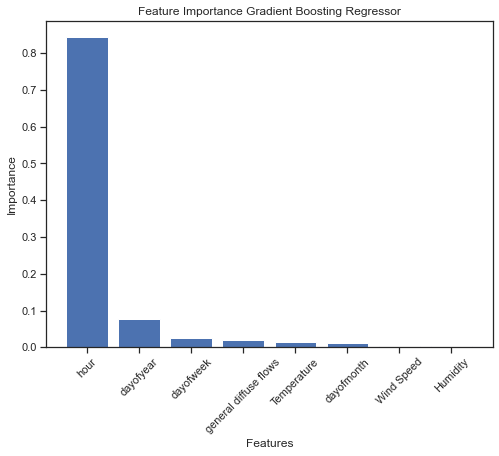

In [76]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_xgb['Features'], feature_importance_xgb['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Gradient Boosting Regressor')
plt.xticks(rotation=45)
plt.savefig("Feature Importance Extreme Gradient Boosting Regressor.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

In [77]:
# Make predictions using the best model
y_pred_xgb = best_model_xgb.predict(X_test)

In [78]:
# Unscale predictions
unscaled_values_xgb = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1)).flatten()

In [79]:
test_data["Predictions_XGB"] = unscaled_values_xgb

<ipython-input-79-8fe83a621808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions_XGB"] = unscaled_values_xgb


In [80]:
test_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,Predictions_Random_Forest,Predictions_XGB
39312,2017-10-01 00:00:00,18.120,87.6,4.916,0.080,0.163,31755.62363,17985.06224,14898.96657,0,6,4,10,274,1,39,28166.716330,27803.671875
39313,2017-10-01 00:10:00,18.000,88.5,4.916,0.055,0.137,31175.84245,17611.61826,14531.30699,0,6,4,10,274,1,39,27807.465370,27925.662109
39314,2017-10-01 00:20:00,18.010,88.4,4.916,0.069,0.148,30154.92341,17148.54772,14321.21581,0,6,4,10,274,1,39,27859.279385,28023.925781
39315,2017-10-01 00:30:00,18.160,88.4,4.914,0.062,0.167,29764.20131,16827.38589,14198.66261,0,6,4,10,274,1,39,27863.983801,27963.689453
39316,2017-10-01 00:40:00,18.180,89.1,4.917,0.051,0.115,29600.35011,16621.99170,13889.36170,0,6,4,10,274,1,39,27702.411104,27914.330078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,52,33703.188752,33480.957031
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,52,33735.246641,33535.339844
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,364,30,52,33915.001031,33891.695312
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,364,30,52,33866.526701,33504.871094


In [81]:
# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("MAE: ", mae_xgb)
print("MAPE: ", mape_xgb)
print("RMSE: ", rmse_xgb)

MAE:  0.12690214508485814
MAPE:  8602950761824.405
RMSE:  0.1508492038630905


Support Vector Regressor

In [82]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

In [83]:
model = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear']
}

grid_search_svr = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ny/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [84]:
print(best_params_svr, best_model_svr)

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'} SVR(C=0.1, kernel='linear')


In [95]:
y_pred_svr = best_model_svr.predict(X_test)

In [96]:
# Unscale predictions
unscaled_values_svr = scaler.inverse_transform(y_pred_svr.reshape(-1, 1)).flatten()

In [97]:
unscaled_values_svr

array([26288.88033809, 26236.52144398, 26240.96708318, ...,
       35728.91554762, 35670.60087621, 35593.90014192])

In [98]:
test_data['Predictions_Support_Vector_Regressor'] = unscaled_values_svr

<ipython-input-98-e5531052155e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions_Support_Vector_Regressor'] = unscaled_values_svr


In [99]:
test_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,Predictions_Random_Forest,Predictions_XGB,Predictions_Support_Vector_Regressor
39312,2017-10-01 00:00:00,18.120,87.6,4.916,0.080,0.163,31755.62363,17985.06224,14898.96657,0,6,4,10,274,1,39,28166.716330,27803.671875,26288.880338
39313,2017-10-01 00:10:00,18.000,88.5,4.916,0.055,0.137,31175.84245,17611.61826,14531.30699,0,6,4,10,274,1,39,27807.465370,27925.662109,26236.521444
39314,2017-10-01 00:20:00,18.010,88.4,4.916,0.069,0.148,30154.92341,17148.54772,14321.21581,0,6,4,10,274,1,39,27859.279385,28023.925781,26240.967083
39315,2017-10-01 00:30:00,18.160,88.4,4.914,0.062,0.167,29764.20131,16827.38589,14198.66261,0,6,4,10,274,1,39,27863.983801,27963.689453,26301.574246
39316,2017-10-01 00:40:00,18.180,89.1,4.917,0.051,0.115,29600.35011,16621.99170,13889.36170,0,6,4,10,274,1,39,27702.411104,27914.330078,26306.683350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,52,33703.188752,33480.957031,35775.115772
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,52,33735.246641,33535.339844,35748.791029
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,364,30,52,33915.001031,33891.695312,35728.915548
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,364,30,52,33866.526701,33504.871094,35670.600876


In [100]:
# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr) * 100
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("MAE: ", mae_svr)
print("MAPE: ", mape_svr)
print("RMSE: ", rmse_svr)

MAE:  0.12777635183879457
MAPE:  15788273816681.445
RMSE:  0.15493617802376966


In [112]:
# Feature Importance SVR
feature_importance_svr = np.abs(best_model_svr.coef_)

In [113]:
feature_importance_svr = feature_importance_svr.flatten()

In [114]:
# Print the feature importances
for feature, importance in zip(data_new.columns, feature_importance_svr):
    print(f"Feature: {feature}, Importance: {importance}")
    
    
    # Convert feature importance to dataframe
    feature_importance_svr = pd.DataFrame({'Features': feature_cols, 'Importance': feature_importance_svr})

    # Sort the dataframe by feature importance in descending order
    feature_importance_svr = feature_importance_svr.sort_values(by='Importance', ascending=False)




Feature: Temperature, Importance: 0.33988975999236715
Feature: Humidity, Importance: 0.009914366787597828


ValueError: could not broadcast input array from shape (2,) into shape (8,)

In [94]:
feature_importance_svr

array([[0.33988976, 0.00991437, 0.00334873, 0.06166937, 0.44710529,
        0.04256238, 0.00630811, 0.01609415]])

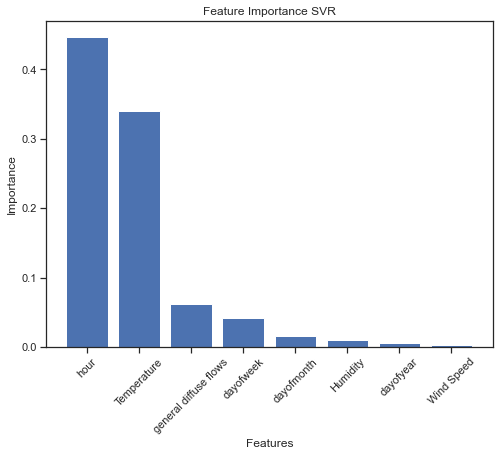

In [115]:

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_svr['Features'], feature_importance_svr['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance SVR')
plt.xticks(rotation=45)
plt.savefig("Feature Importance SVR.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

LSTM

In [117]:
import keras_tuner as tf
from tensorflow import keras
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

<ipython-input-117-8c6d1a345898>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [118]:
# Define the LSTM model architecture
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_of_layers", 2, 20)):
        model.add(layers.Dense(units = hp.Int("units",
                                 min_value = 32,
                                 max_value = 512,
                                 step = 16),
                        activation = "relu"))
    
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5))),
    model.add(layers.Dense(1, activation = "linear")),
    model.compile(
        optimizer = keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss = "mean_squared_error",
        metrics = ["mean_squared_error"])
    return model

In [119]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [120]:
# Define the hyperparameter search space for Hyperband
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    seed=42,
    hyperband_iterations=2,
    directory='hyperband',
    project_name='load_forecasting'
#     callbacks=[early_stopping]
)

INFO:tensorflow:Reloading Oracle from existing project hyperband/load_forecasting/oracle.json
INFO:tensorflow:Reloading Tuner from hyperband/load_forecasting/tuner0.json


In [121]:
# Perform hyperparameter tuning using Hyperband
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

INFO:tensorflow:Oracle triggered exit


In [225]:
tuner.results_summary(1)

Results summary
Results in hyperband/load_forecasting
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_of_layers: 3
units: 288
dropout_rate: 0.1381339601913495
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.014594659209251404


In [122]:
# Get the best model
best_model_lstm = tuner.get_best_models(1)[0]
print(best_model_lstm)

In [123]:
# Generate predictions
y_pred_lstm = best_model_lstm.predict(X_test)

In [124]:
y_pred_lstm

array([[0.33689094],
       [0.334342  ],
       [0.33454883],
       ...,
       [0.5731409 ],
       [0.57110566],
       [0.5676998 ]], dtype=float32)

In [125]:
# Unscale predictions
unscaled_values_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

In [126]:
test_data["Predictions_LSTM"] = unscaled_values_lstm

<ipython-input-126-d1ae997e2a37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions_LSTM"] = unscaled_values_lstm


In [127]:
# Define evaluation metrics
def evaluate_model(y_test, y_pred_lstm):
    mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
    return mae_lstm, mse_lstm, mape_lstm

In [128]:
# Evaluate the model
mae_lstm, mse_lstm, mape_lstm = evaluate_model(y_test, y_pred_lstm)
print("MAE: {:.2f}".format(mae_lstm))
print("MSE: {:.2f}".format(mse_lstm))
print("MAPE: {:.2f}%".format(mape_lstm * 100))

MAE: 0.10
MSE: 0.01
MAPE: 11080141528718.37%


In [137]:
original_metric = mean_absolute_error(y_test, y_pred_lstm)

In [140]:
from sklearn.utils import shuffle
# Calculate feature importance
feature_names = feature_cols
feature_importance_lst = []

for feature in feature_names:
    X_val_shuffled = X_test.copy()
    X_val_shuffled = shuffle(X_test)
    y_pred_shuffled = best_model_lstm.predict(X_val_shuffled)
    shuffled_metric = mean_absolute_error(y_test, y_pred_shuffled)
    importance = original_metric - shuffled_metric
    feature_importance_lst.append(importance)



                 Feature  Importance
5              dayofweek   -0.120348
4                   hour   -0.120352
7             dayofmonth   -0.121044
1               Humidity   -0.121768
3  general diffuse flows   -0.121855
0            Temperature   -0.122345
2             Wind Speed   -0.122869
6              dayofyear   -0.122928


In [146]:
# Rank the features based on their importance values
importance_lstm = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_lst})
importance_lstm = importance_lstm.sort_values('Importance', ascending=False)


# Print the feature importance
print(importance_lstm)

                 Feature  Importance
5              dayofweek   -0.120348
4                   hour   -0.120352
7             dayofmonth   -0.121044
1               Humidity   -0.121768
3  general diffuse flows   -0.121855
0            Temperature   -0.122345
2             Wind Speed   -0.122869
6              dayofyear   -0.122928


In [ ]:
    
    
    
    X_val_permuted = X_test.copy()
    np.random.shuffle(X_val_permuted[:, i])
    y_pred_permuted = best_model_lstm.predict(X_val_permuted)
    permuted_metric = mean_absolute_error(y_test, y_pred_permuted)
    importance = baseline_metric - permuted_metric
    feature_importance_lst[i] = importance

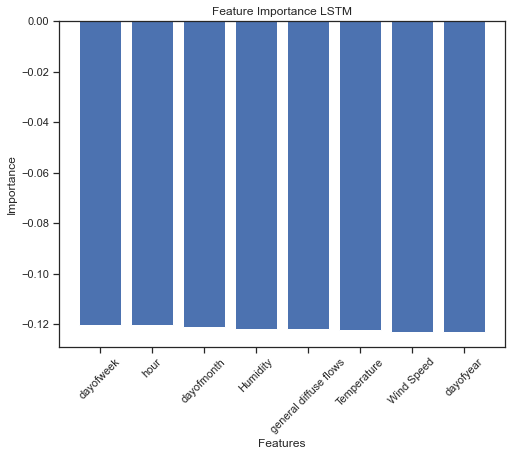

In [147]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_lstm['Feature'], importance_lstm['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance LSTM')
plt.xticks(rotation=45)
plt.savefig("Feature Importance LSTM.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

In [189]:
baseline_metric = mean_absolute_error(y_test, y_pred_lstm)

# Calculate feature importance
feature_names = feature_cols
feature_importance_lst = []

for feature in range(feature_names):
    X_val_permuted = X_test.copy()
    np.random.shuffle(X_val_permuted[:, i])
    y_pred_permuted = best_model_lstm.predict(X_val_permuted)
    permuted_metric = mean_absolute_error(y_test, y_pred_permuted)
    importance = baseline_metric - permuted_metric
    feature_importance_lst.append(importance)

# Rank the features based on their importance values
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Print the feature importance
for i, feature_cols in enumerate(sorted_indices):
    print(f"Feature {feature_cols}: Importance = {sorted_importance[i]}")

Feature 6: Importance = 0.005143783226003909
Feature 7: Importance = 0.0003494061648586233
Feature 2: Importance = -9.740552307592465e-05
Feature 1: Importance = -0.00045028489086504364
Feature 5: Importance = -0.0013802762842979877
Feature 0: Importance = -0.01607105736186859
Feature 3: Importance = -0.01682065854754032
Feature 4: Importance = -0.09974226652564777


In [178]:
sorted_indices

array([6, 7, 2, 1, 5, 0, 3, 4])

In [183]:
sorted_importance

array([ 5.14378323e-03,  3.49406165e-04, -9.74055231e-05, -4.50284891e-04,
       -1.38027628e-03, -1.60710574e-02, -1.68206585e-02, -9.97422665e-02])

# Plotting Predictions from Models

In [132]:
test_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,Predictions_Random_Forest,Predictions_XGB,Predictions_Support_Vector_Regressor,Predictions_LSTM
39312,2017-10-01 00:00:00,18.120,87.6,4.916,0.080,0.163,31755.62363,17985.06224,14898.96657,0,6,4,10,274,1,39,28166.716330,27803.671875,26288.880338,27650.013672
39313,2017-10-01 00:10:00,18.000,88.5,4.916,0.055,0.137,31175.84245,17611.61826,14531.30699,0,6,4,10,274,1,39,27807.465370,27925.662109,26236.521444,27573.089844
39314,2017-10-01 00:20:00,18.010,88.4,4.916,0.069,0.148,30154.92341,17148.54772,14321.21581,0,6,4,10,274,1,39,27859.279385,28023.925781,26240.967083,27579.332031
39315,2017-10-01 00:30:00,18.160,88.4,4.914,0.062,0.167,29764.20131,16827.38589,14198.66261,0,6,4,10,274,1,39,27863.983801,27963.689453,26301.574246,27685.388672
39316,2017-10-01 00:40:00,18.180,89.1,4.917,0.051,0.115,29600.35011,16621.99170,13889.36170,0,6,4,10,274,1,39,27702.411104,27914.330078,26306.683350,27706.314453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,364,30,52,33703.188752,33480.957031,35775.115772,34835.578125
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,364,30,52,33735.246641,33535.339844,35748.791029,34804.792969
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,364,30,52,33915.001031,33891.695312,35728.915548,34779.734375
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,364,30,52,33866.526701,33504.871094,35670.600876,34718.312500


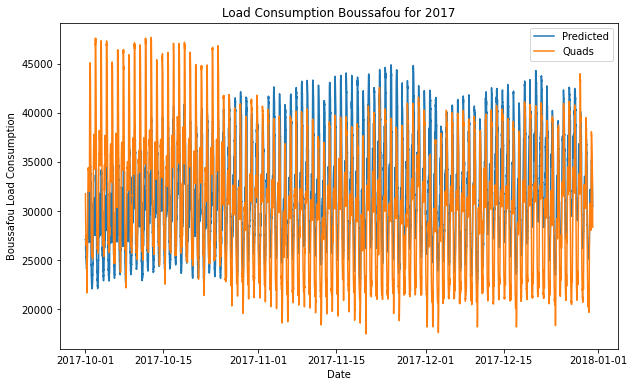

In [92]:
plt.figure(figsize=(10,6))
plt.plot(test_data['DateTime'], test_data['Predicted'],label = "Predicted")
plt.plot(test_data['DateTime'], test_data['Quads'],label = "Quads")
plt.title("Load Consumption Boussafou for 2017")
plt.xlabel("Date")
plt.ylabel("Boussafou Load Consumption")
plt.legend()
# plt.savefig("Boussafou Load Consumption for August.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

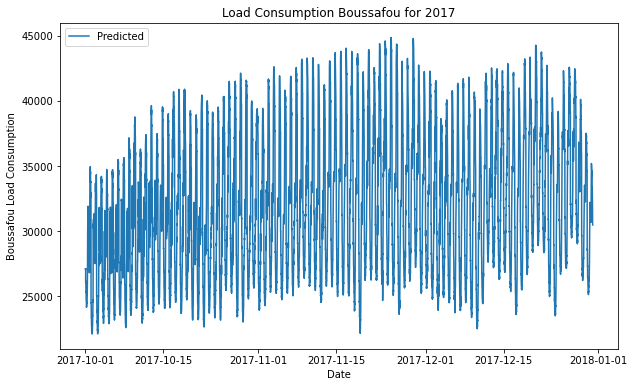

In [93]:
plt.figure(figsize=(10,6))
plt.plot(test_data['DateTime'], test_data['Predicted'],label = "Predicted")
# plt.plot(test_data['DateTime'], test_data['Quads'],label = "Quads")
plt.title("Load Consumption Boussafou for 2017")
plt.xlabel("Date")
plt.ylabel("Boussafou Load Consumption")
plt.legend()
# plt.savefig("Boussafou Load Consumption for August.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

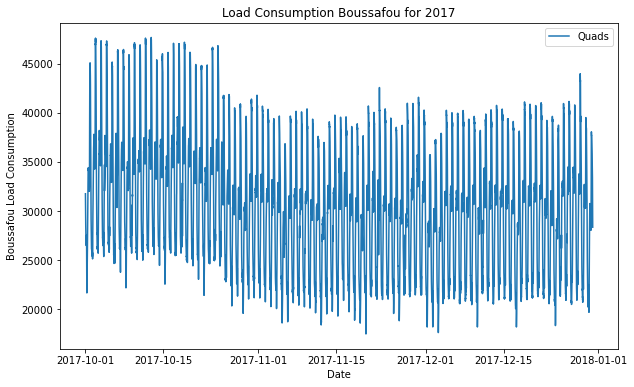

In [94]:
plt.figure(figsize=(10,6))
# plt.plot(test_data['DateTime'], test_data['Predicted'],label = "Predicted")
plt.plot(test_data['DateTime'], test_data['Quads'],label = "Quads")
plt.title("Load Consumption Boussafou for 2017")
plt.xlabel("Date")
plt.ylabel("Boussafou Load Consumption")
plt.legend()
# plt.savefig("Boussafou Load Consumption for August.jpeg", dpi=300, bbox_inches= "tight")
plt.show()